In [1]:
import time

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

%matplotlib inline

### Output analysis, all agents


In [2]:
def read_all_runs(path):
    df_list = []
    for file in os.listdir(os.getcwd() + "/" + path):
        if file.startswith("model"):
            df = pd.read_pickle(path + str(file))
            df_list.append(df.to_numpy())
    df_mean = pd.DataFrame(np.array(df_list).mean(axis=0),
                           index=df.index,
                           columns=df.columns)
    df_std = pd.DataFrame(np.array(df_list).std(axis=0),
                          index=df.index,
                          columns=df.columns)
    return df_mean, df_std

def plot_diffusion_rate(df_mean, df_std, var,
                        label, color=None, linestyle=None, linewidth=2):
    rate = df_mean[var]
    rate_std = df_std[var]
    plt.plot(df_mean.index, rate,
             c=color, linestyle=linestyle, linewidth=linewidth,
             label=label)
    plt.fill_between(df_mean.index, rate, rate - rate_std,
                     color=color, alpha=0.2)
    plt.fill_between(df_mean.index, rate, rate + rate_std,
                     color=color, alpha=0.2)

In [3]:
df_rep_rat_mean, df_rep_rat_std = read_all_runs("results/Representative_rational_agent/")
df_rat_mean, df_rat_std = read_all_runs("results/Rational/")
df_TPB_mean, df_TPB_std = read_all_runs("results/TPB/")
df_TPB_opinion_mean, df_TPB_opinion_std = read_all_runs("results/TPB_with_opinion_dynamics_avg/")

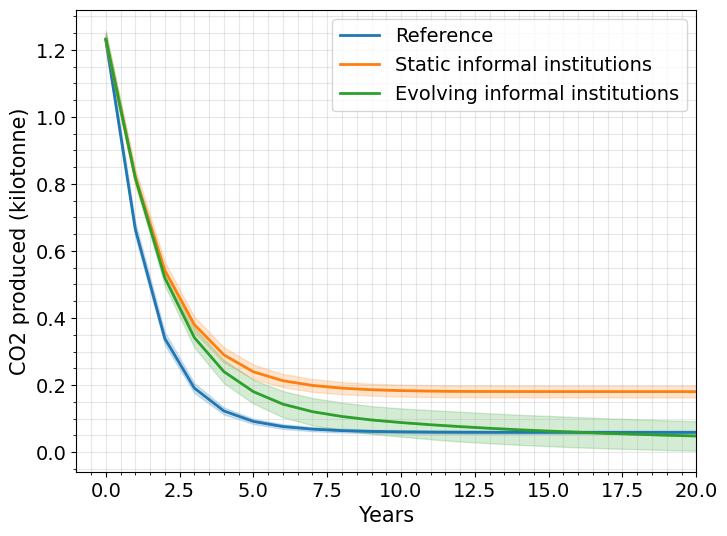

In [4]:
# Set plot layout
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.xlim(-1, 20)
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()

plot_diffusion_rate(df_rat_mean, df_rat_std, "CO2_produced (kilotonne)",
                    label="Reference",
                    color="tab:blue")
plot_diffusion_rate(df_TPB_mean, df_TPB_std, "CO2_produced (kilotonne)",
                    label="Static informal institutions",
                    color="tab:orange")
plot_diffusion_rate(df_TPB_opinion_mean, df_TPB_opinion_std, "CO2_produced (kilotonne)",
                    label="Evolving informal institutions",
                    color="tab:green")

# plt.title("CO2 produced per timestep; N = 1000, 100 runs",
#           fontsize=15.8)
plt.xlabel("Years", fontsize=15)
plt.ylabel("CO2 produced (kilotonne)", fontsize=15)
plt.legend()
plt.show()

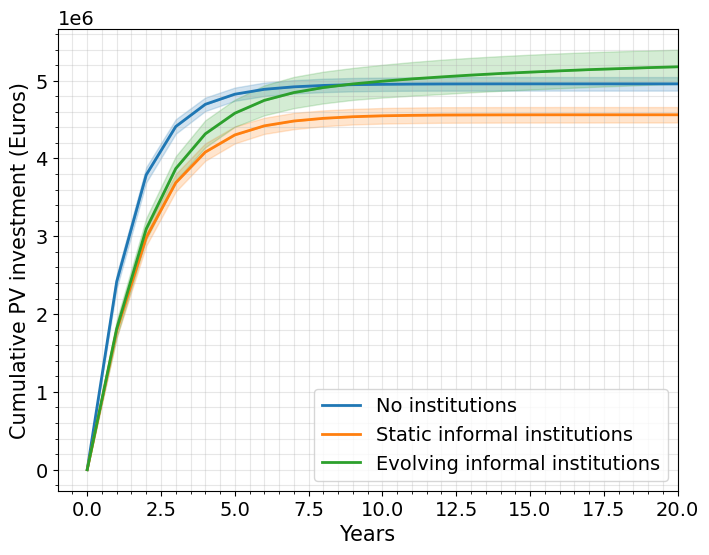

In [5]:
# Set plot layout
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.xlim(-1, 20)
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()

plot_diffusion_rate(df_rat_mean, df_rat_std, "PV_investment (Euros)",
                    label="No institutions",
                    color="tab:blue")
plot_diffusion_rate(df_TPB_mean, df_TPB_std, "PV_investment (Euros)",
                    label="Static informal institutions",
                    color="tab:orange")
plot_diffusion_rate(df_TPB_opinion_mean, df_TPB_opinion_std, "PV_investment (Euros)",
                    label="Evolving informal institutions",
                    color="tab:green")

# plt.title("Cumulative PV investment; N = 1000, 100 runs",
#           fontsize=15.8)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Cumulative PV investment (Euros)", fontsize=15)
plt.legend()
plt.show()

### Bar graphs (T = 20)

#### CO2 produced

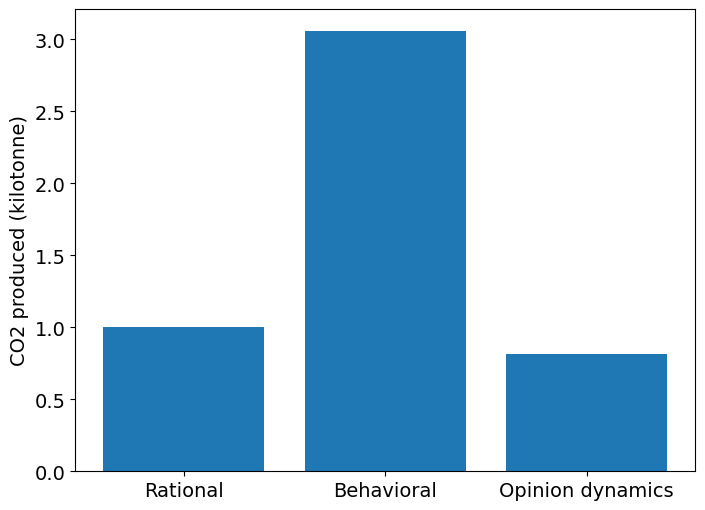

In [6]:
agent_types = ["Rational", "Behavioral", "Opinion dynamics"]
CO2 = [df_rat_mean.loc[20]["CO2_produced (kilotonne)"],
       df_TPB_mean.loc[20]["CO2_produced (kilotonne)"],
       df_TPB_opinion_mean.loc[20]["CO2_produced (kilotonne)"],
      ]

plt.bar(agent_types, CO2/CO2[0])
plt.ylabel("CO2 produced (kilotonne)")
plt.show()

Annual CO2 produced per capita at T = 20, no institutions: 59.03047798396317
Annual CO2 produced per capita at T = 20, with institutions: 180.44035204056476
Normalized: 1.0 3.0567320171384185


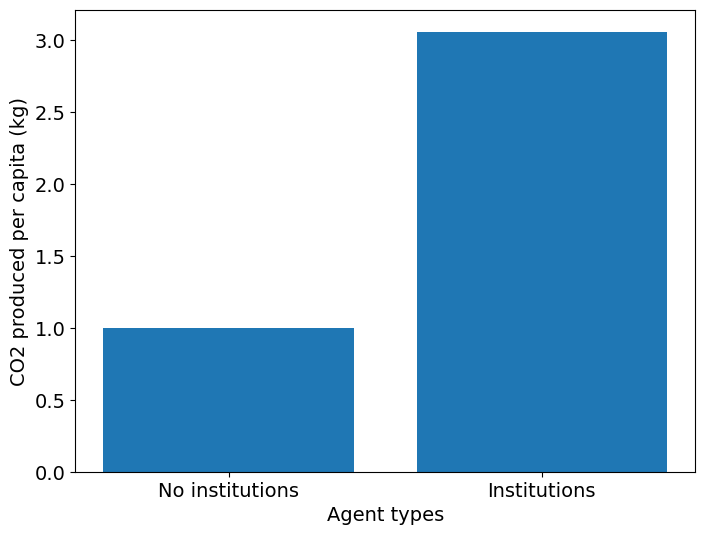

In [7]:
# Plot CO2 produced per capita "institution vs. no institution"
agent_types = ["No institutions", "Institutions"]
CO2 = [df_rat_mean.loc[20]["CO2_produced (kilotonne)"]/1000*1000*1000,
       df_TPB_mean.loc[20]["CO2_produced (kilotonne)"]/1000*1000*1000,
#        df_TPB_opinion_mean.loc[20]["CO2_produced (kilotonne)"],
      ]

print("Annual CO2 produced per capita at T = 20, no institutions:", CO2[0])
print("Annual CO2 produced per capita at T = 20, with institutions:", CO2[1])
print("Normalized:", CO2[0]/CO2[0], CO2[1]/CO2[0])

plt.bar(agent_types, CO2/CO2[0])
plt.xlabel("Agent types")
plt.ylabel("CO2 produced per capita (kg)")
plt.show()

[1229.4090106208478, 59.03047798396317, 180.44035204056476]
[0, 4.599002247656434, 17.14970110139152]
Residual CO2 emissions remaining with PV uptake, no institutions: 0.04427450528349309  to  0.05175615249434923
Residual CO2 emissions remaining with PV uptake, with institutions: 0.13282044423662714  to  0.160719542019766
Difference (in %): 0.08106429174227792 to 0.1164450367362729


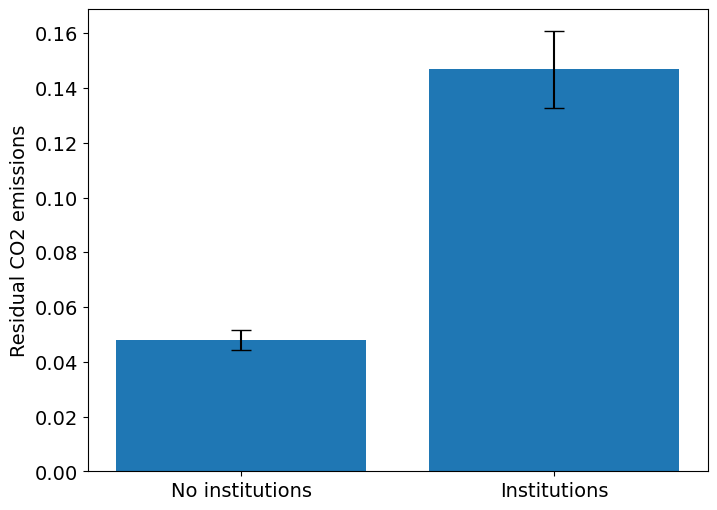

In [8]:
# Plot CO2 produced per capita "institution vs. no institution"
agent_types = ["No institutions", "Institutions"]
CO2 = [df_rat_mean.loc[0]["CO2_produced (kilotonne)"]/1000*1000*1000,
       df_rat_mean.loc[20]["CO2_produced (kilotonne)"]/1000*1000*1000,
       df_TPB_mean.loc[20]["CO2_produced (kilotonne)"]/1000*1000*1000,
      ]
CO2_std = [0,
           df_rat_std.loc[20]["CO2_produced (kilotonne)"]/1000*1000*1000,
           df_TPB_std.loc[20]["CO2_produced (kilotonne)"]/1000*1000*1000,]
print(CO2)
print(CO2_std)

print("Residual CO2 emissions remaining with PV uptake, no institutions:",
      (CO2[1]-CO2_std[1])/CO2[0], " to ", (CO2[1]+CO2_std[1])/CO2[0])
print("Residual CO2 emissions remaining with PV uptake, with institutions:",
      (CO2[2]-CO2_std[2])/CO2[0], " to ", (CO2[2]+CO2_std[2])/CO2[0])
print("Difference (in %):", (CO2[2]-CO2_std[2])/CO2[0] - (CO2[1]+CO2_std[1])/CO2[0],
      "to", (CO2[2]+CO2_std[2])/CO2[0] - (CO2[1]-CO2_std[1])/CO2[0])

plt.bar(agent_types, CO2[1:]/CO2[0],
        yerr=CO2_std[1:]/CO2[0], capsize=7)
plt.ylabel("Residual CO2 emissions")
plt.show()

#### PV investment

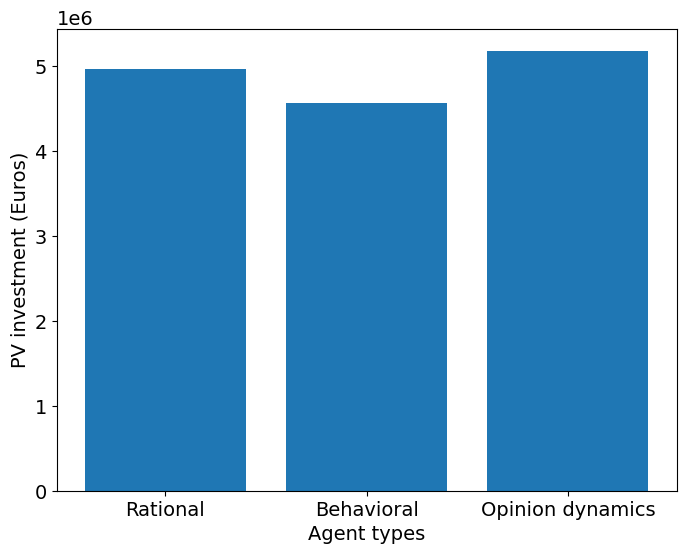

In [9]:
agent_types = ["Rational", "Behavioral", "Opinion dynamics"]
CO2 = [df_rat_mean.loc[20]["PV_investment (Euros)"],
       df_TPB_mean.loc[20]["PV_investment (Euros)"],
       df_TPB_opinion_mean.loc[20]["PV_investment (Euros)"],
      ]

plt.bar(agent_types, CO2)
plt.xlabel("Agent types")
plt.ylabel("PV investment (Euros)")
plt.show()

Cumulative cost at T = 20, no institutions: 4958859.84
Cumulative cost at T = 20, with institutions: 4561371.36
Normalized: 1.0 0.9198427677278332


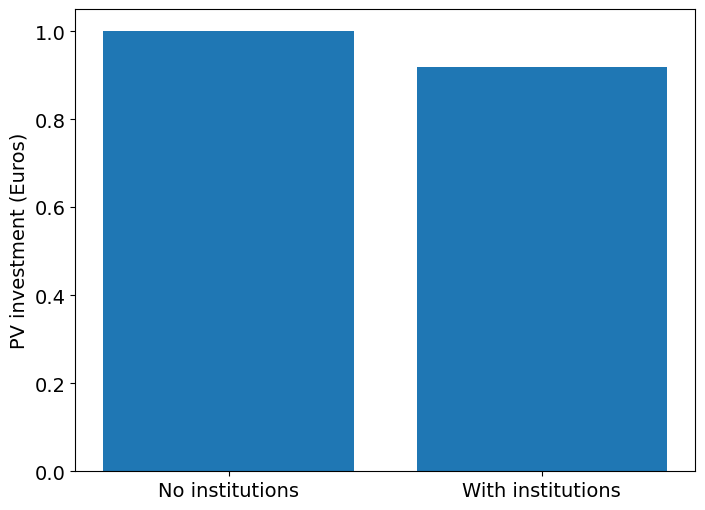

In [10]:
agent_types = ["No institutions", "With institutions"]
cost = [df_rat_mean.loc[20]["PV_investment (Euros)"],
        df_TPB_mean.loc[20]["PV_investment (Euros)"],
#         df_TPB_opinion_mean.loc[20]["PV_investment (Euros)"],
       ]
print("Cumulative cost at T = 20, no institutions:", cost[0])
print("Cumulative cost at T = 20, with institutions:", cost[1])
print("Normalized:", cost[0]/cost[0], cost[1]/cost[0])

plt.bar(agent_types, cost/cost[0])
# plt.xlabel("Agent types")
plt.ylabel("PV investment (Euros)")
plt.show()

## Distributional outputs

### Per income group

In [11]:
legend_labels = ["< 10.000",
                 "10.000 - 30.000",
                 "30.000 - 50.000",
                 "50.000 - 70.000",
                 "70.000 - 90.000",
                 "90.000 - 110.000",
                 "> 110.000"
                ]
income_bins = [0, 10000, 30000, 50000, 70000, 90000, 110000, 10e9]

#### Diffusion rate

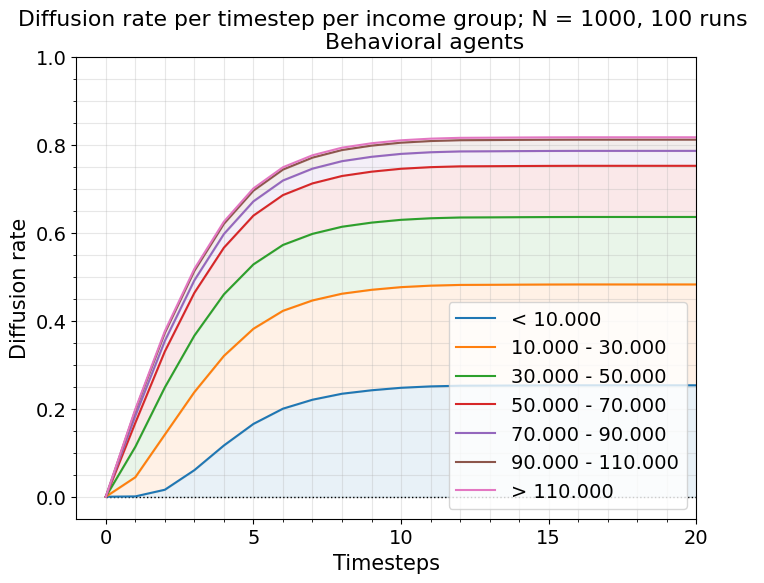

In [12]:
df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/TPB"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB/"
                            + file)
        df["Income group"] = pd.cut(df["Income (Euros)"], income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
        df_values = df["Income group"].value_counts().values
        df.reset_index()
        # Take mean to get percentage of agents that have taken action per income group per timestep
        df = df.groupby(["Step", "Income group"]).mean().reset_index()
        df["PV_installed"] = df["PV_installed"] * np.tile(df_values/sum(df_values),
                                                          len(list(set(df["Step"].values))))
        df_list.append(df.to_numpy())

df_mean = pd.DataFrame(np.array(df_list).mean(axis=0),
                                          index=df.index,
                                          columns=df.columns)
df_std = pd.DataFrame(np.array(df_list).std(axis=0),
                                         index=df.index,
                                         columns=df.columns)

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14

plt.title("Diffusion rate per timestep per income group; N = 1000, 100 runs \n\
           Behavioral agents",
          fontsize=15.8)
plt.xlabel("Timesteps", fontsize=15)
plt.ylabel("Diffusion rate", fontsize=15)

timesteps = range(21)
diffusion_rate = np.zeros(len(timesteps))
plt.plot(timesteps, diffusion_rate, c="black", linestyle=":", linewidth=1)
for i in range(1, len(income_bins)):
    diffusion_rate_prev = diffusion_rate.copy()
    diffusion_rate += df_mean[df_mean["Income group"] == i]["PV_installed"].values
    line = plt.plot(timesteps, diffusion_rate,
                    label=legend_labels[i-1])
    plt.fill_between(timesteps, diffusion_rate, diffusion_rate_prev,
                     color=line[0].get_color(), alpha=0.1)

plt.xlim(-1, 20)
plt.ylim(-0.05, 1)
plt.xticks(range(0, 21, 5))
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()
plt.legend()
plt.show()

#### CO2 saved

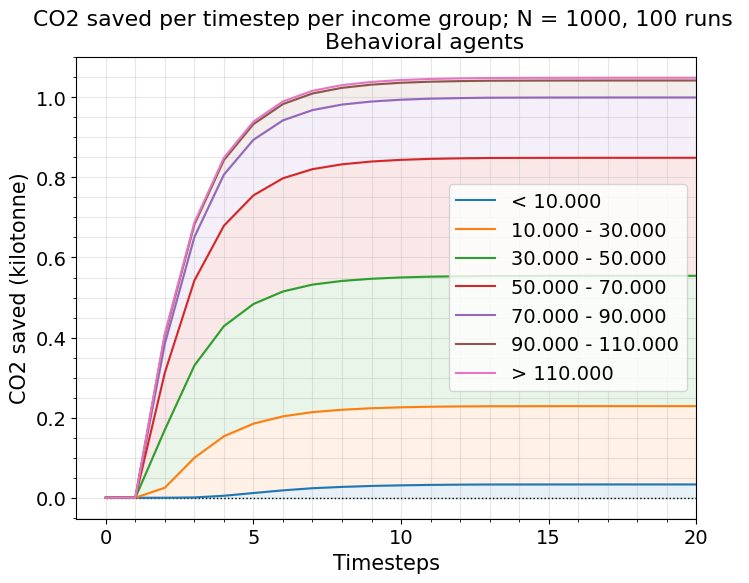

In [13]:
df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/TPB"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB/"
                            + file)
        df["Income group"] = pd.cut(df["Income (Euros)"], income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
#         df_values = df["Income group"].value_counts().values
        df.reset_index()
        # Sum for total CO2 saved per income group per timestep
        df = df.groupby(["Step", "Income group"]).sum().reset_index()
        df_list.append(df.to_numpy())

df_mean = pd.DataFrame(np.array(df_list).mean(axis=0),
                                          index=df.index,
                                          columns=df.columns)
df_std = pd.DataFrame(np.array(df_list).std(axis=0),
                                         index=df.index,
                                         columns=df.columns)

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.title("CO2 saved per timestep per income group; N = 1000, 100 runs \n\
           Behavioral agents",
          fontsize=15.8)
plt.xlabel("Timesteps", fontsize=15)
plt.ylabel("CO2 saved (kilotonne)", fontsize=15)

timesteps = range(21)
CO2_saved = np.zeros(len(timesteps))
plt.plot(timesteps, CO2_saved, c="black", linestyle=":", linewidth=1)
for i in range(1, len(income_bins)):
    CO2_saved_prev = CO2_saved.copy()
    CO2_saved += df_mean[df_mean["Income group"] == i]["CO2_saved (kg)"].values/1e6
    line = plt.plot(timesteps, CO2_saved,
                    label=legend_labels[i-1])
    plt.fill_between(timesteps, CO2_saved, CO2_saved_prev,
                     color=line[0].get_color(), alpha=0.1)

plt.xlim(-1, 20)
# plt.ylim(-0.5, 10)
plt.xticks(range(0, 21, 5))
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()
plt.legend()
plt.show()

#### PV investment

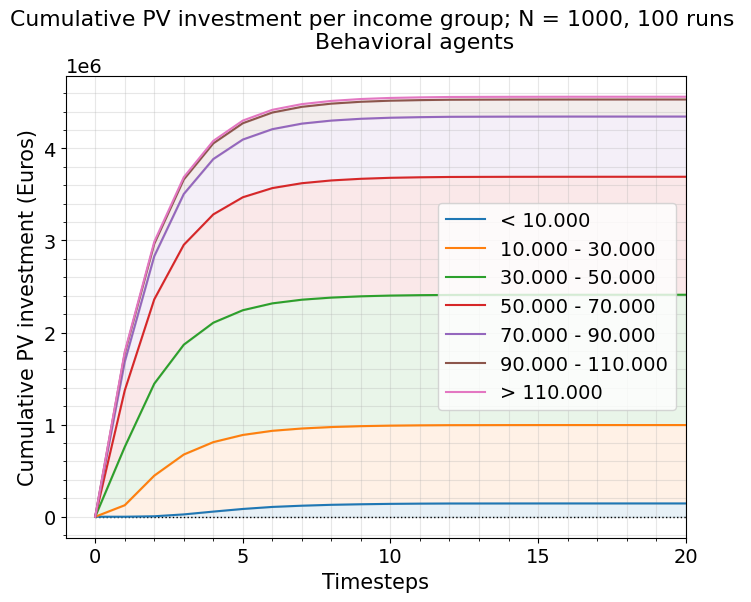

In [14]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.title("Cumulative PV investment per income group; N = 1000, 100 runs \n\
           Behavioral agents",
          fontsize=15.8)
plt.xlabel("Timesteps", fontsize=15)
plt.ylabel("Cumulative PV investment (Euros)", fontsize=15)

PV_investment = np.zeros(len(timesteps))
plt.plot(timesteps, PV_investment, c="black", linestyle=":", linewidth=1)
for i in range(1, len(income_bins)):
    PV_investment_prev = PV_investment.copy()
    PV_investment += df_mean[df_mean["Income group"] == i]["PV_investment (Euros)"].values
    line = plt.plot(timesteps, PV_investment,
                    label=legend_labels[i-1])
    plt.fill_between(timesteps, PV_investment, PV_investment_prev,
                     color=line[0].get_color(), alpha=0.1)
plt.xlim(-1, 20)
# plt.ylim(-2e6, 5e7)
plt.xticks(range(0, 21, 5))
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()
plt.legend()
plt.show()

### Per energy use group

In [15]:
legend_labels = ["Energy use < 1000 kWh/year",
                 "Energy use 1000 - 2000 kWh/year",
                 "Energy use 2000 - 3000 kWh/year",
                 "Energy use 3000 - 4000 kWh/year",
                 "Energy use 4000 - 5000 kWh/year",
                 "Energy use 5000 - 6000 kWh/year",
                 "Energy use > 6000 kWh/year"
                ]
energy_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]

#### Rational agents

In [16]:
def plot_PV_investment(df_mean, df_std, title):
    # PV investment, absolute
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"] = 14
#     plt.title("Cumulative PV investment; N = 1000, 100 runs \n" + str(title),
#               fontsize=15.8)
    plt.xlabel("Years", fontsize=15)
    plt.ylabel("PV investment (Euros)", fontsize=15)

    timesteps = range(20)
    PV_investment = np.zeros(len(timesteps))
    plt.plot(timesteps, PV_investment, c="black", linestyle=":", linewidth=1)
    for i in range(1, len(energy_bins)):
        PV_investment_prev = PV_investment.copy()
        PV_investment += df_mean[df_mean["Energy group"] == i]["PV_investment (Euros)"].values
        PV_investment_std = df_std[df_std["Energy group"] == i]["PV_investment (Euros)"].values
        line = plt.plot(timesteps, PV_investment,
                        label=legend_labels[i-1])
        plt.fill_between(timesteps, PV_investment - PV_investment_std,
                         PV_investment + PV_investment_std,
                         color=line[0].get_color(), alpha=0.3)
        plt.fill_between(timesteps, PV_investment, PV_investment_prev,
                         color=line[0].get_color(), alpha=0.1)

    plt.xlim(-1, 20)
    plt.ylim(-1e5, 5.5e6)
    plt.xticks(range(0, 20, 5))
    plt.grid(True, which="major", alpha=0.3)
    plt.grid(True, which="minor", alpha=0.3)
    plt.minorticks_on()
    plt.legend(bbox_to_anchor=(0.5, 0.2, 1, 0.5))
    plt.show()

    # PV investment, relative (% of total investment)
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"] = 14
#     plt.title("Cumulative PV investment; N = 1000, 100 runs \n" + str(title),
#               fontsize=15.8)
    plt.xlabel("Years", fontsize=15)
    plt.ylabel("PV investment (% of total investment)", fontsize=15)

    timesteps = range(20)
    PV_investment = np.zeros(len(timesteps))
    plt.plot(timesteps, PV_investment, c="black", linestyle=":", linewidth=1)
    for i in range(1, len(energy_bins)):
        PV_investment_prev = PV_investment.copy()
        PV_investment += df_mean[df_mean["Energy group"] == i]["PV_investment (% of total)"].values
        PV_investment_std = df_std[df_std["Energy group"] == i]["PV_investment (% of total)"].values
        line = plt.plot(timesteps, PV_investment,
                        label=legend_labels[i-1])
        plt.fill_between(timesteps, PV_investment - PV_investment_std,
                         PV_investment + PV_investment_std,
                         color=line[0].get_color(), alpha=0.3)
        plt.fill_between(timesteps, PV_investment, PV_investment_prev,
                         color=line[0].get_color(), alpha=0.1)

    plt.xlim(-1, 20)
    plt.xticks(range(0, 20, 5))
    plt.grid(True, which="major", alpha=0.3)
    plt.grid(True, which="minor", alpha=0.3)
    plt.minorticks_on()
    plt.legend(bbox_to_anchor=(0.5, 0.2, 1, 0.5))
    plt.show()

In [17]:
def plot_CO2_emissions(df_mean, df_std, title):
    # CO2 produced, absolute
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"] = 14
    plt.title("CO2 produced per energy use group; N = 1000, 100 runs \n" + str(title),
               fontsize=15.8)
    plt.xlabel("Years", fontsize=15)
    plt.ylabel("CO2 produced (kg)", fontsize=15)

    timesteps = range(20)
    CO2_produced = np.zeros(len(timesteps))
    plt.plot(timesteps, CO2_produced, c="black", linestyle=":", linewidth=1)
    for i in range(1, len(energy_bins)):
        CO2_produced_prev = CO2_produced.copy()
        CO2_produced += df_mean[df_mean["Energy group"] == i]["CO2_produced (kg)"].values
        CO2_produced_std = df_std[df_std["Energy group"] == i]["CO2_produced (kg)"].values
        line = plt.plot(timesteps, CO2_produced,
                        label=legend_labels[i-1])
        plt.fill_between(timesteps, CO2_produced - CO2_produced_std,
                         CO2_produced + CO2_produced_std,
                         color=line[0].get_color(), alpha=0.3)
        plt.fill_between(timesteps, CO2_produced, CO2_produced_prev,
                         color=line[0].get_color(), alpha=0.1)

    plt.xlim(-1, 20)
    plt.xticks(range(0, 20, 5))
    plt.grid(True, which="major", alpha=0.3)
    plt.grid(True, which="minor", alpha=0.3)
    plt.minorticks_on()
    plt.legend(bbox_to_anchor=(0.5, 0.2, 1, 0.5))
    plt.show()

    # CO2 produced, relatively (% of total)
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"] = 14
#     plt.title("CO2 produced per energy use group; N = 1000, 100 runs \n" + str(title),
#               fontsize=15.8)
    plt.xlabel("Years", fontsize=15)
    plt.ylabel("CO2 produced (% of total production)", fontsize=15)

    timesteps = range(20)
    CO2_produced = np.zeros(len(timesteps))
    plt.plot(timesteps, CO2_produced, c="black", linestyle=":", linewidth=1)
    for i in range(1, len(energy_bins)):
        CO2_produced_prev = CO2_produced.copy()
        CO2_produced += df_mean[df_mean["Energy group"] == i]["CO2_produced (% of total)"].values
        CO2_produced_std = df_std[df_std["Energy group"] == i]["CO2_produced (% of total)"].values
        line = plt.plot(timesteps, CO2_produced,
                        label=legend_labels[i-1])
        plt.fill_between(timesteps, CO2_produced - CO2_produced_std,
                         CO2_produced + CO2_produced_std,
                         color=line[0].get_color(), alpha=0.3)
        plt.fill_between(timesteps, CO2_produced, CO2_produced_prev,
                         color=line[0].get_color(), alpha=0.1)

    plt.xlim(-1, 20)
    plt.xticks(range(0, 20, 5))
    plt.grid(True, which="major", alpha=0.3)
    plt.grid(True, which="minor", alpha=0.3)
    plt.minorticks_on()
    plt.legend(loc="lower right", fontsize="small",
               bbox_to_anchor=(0.5, 0.45, 0.6, 0.5))
    plt.show()

In [18]:
df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/Rational"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/Rational/"
                            + file)
        df["Energy group"] = pd.cut(df["Energy use (kWh/year)"], energy_bins,
                                    labels=range(1,8))
        df = df.drop(["Energy use (kWh/year)"], axis=1)
        df = df.drop(0)
        df.reset_index()
        # Sum for total CO2 produced per income group per timestep
        df = df.groupby(["Step", "Energy group"]).sum().reset_index()
        df_list.append(df.to_numpy())

df_mean = pd.DataFrame(np.array(df_list).mean(axis=0),
                       index=df.index,
                       columns=df.columns)
df_std = pd.DataFrame(np.array(df_list).std(axis=0),
                      index=df.index,
                      columns=df.columns)
df_std["Step"] = df_mean["Step"]
df_std["Energy group"] = df_mean["Energy group"]
df_mean["CO2_produced (% of total)"] = df_mean["CO2_produced (kg)"]/df_mean.groupby(["Step"]).transform("sum")["CO2_produced (kg)"]*100
df_mean["PV_investment (% of total)"] = df_mean["PV_investment (Euros)"]/df_mean.groupby(["Step"]).transform("sum")["PV_investment (Euros)"]*100
df_std["CO2_produced (% of total)"] = df_std["CO2_produced (kg)"]/df_mean.groupby(["Step"]).transform("sum")["CO2_produced (kg)"]*100
df_std["PV_investment (% of total)"] = df_std["PV_investment (Euros)"]/df_mean.groupby(["Step"]).transform("sum")["PV_investment (Euros)"]*100
df_std[df_std["Step"] == 20]

,Step,Energy group,Income (Euros),PV_installed,PV_investment (Euros),CO2_saved (kg),CO2_produced (kg),CO2_produced (% of total),PV_investment (% of total)
133,20.0,1.0,465405.562910,0.000000,0.000000,0.000000,2482.208859,4.204961,0.000000
134,20.0,2.0,651610.103620,10.091858,39189.715277,7363.218040,4173.578396,7.070209,0.796085
135,20.0,3.0,777603.910212,14.318837,71410.581464,15619.980091,0.000000,0.000000,1.450608
136,20.0,4.0,760780.689609,13.183516,80438.551790,19148.841973,0.000000,0.000000,1.633999
137,20.0,5.0,593903.894898,10.801940,79379.983711,20251.143210,0.000000,0.000000,1.612496
138,20.0,6.0,429493.405199,7.344903,64242.730030,17086.953058,0.000000,0.000000,1.305003
139,20.0,7.0,218452.102623,4.116734,40629.626949,11094.109909,0.000000,0.000000,0.825335


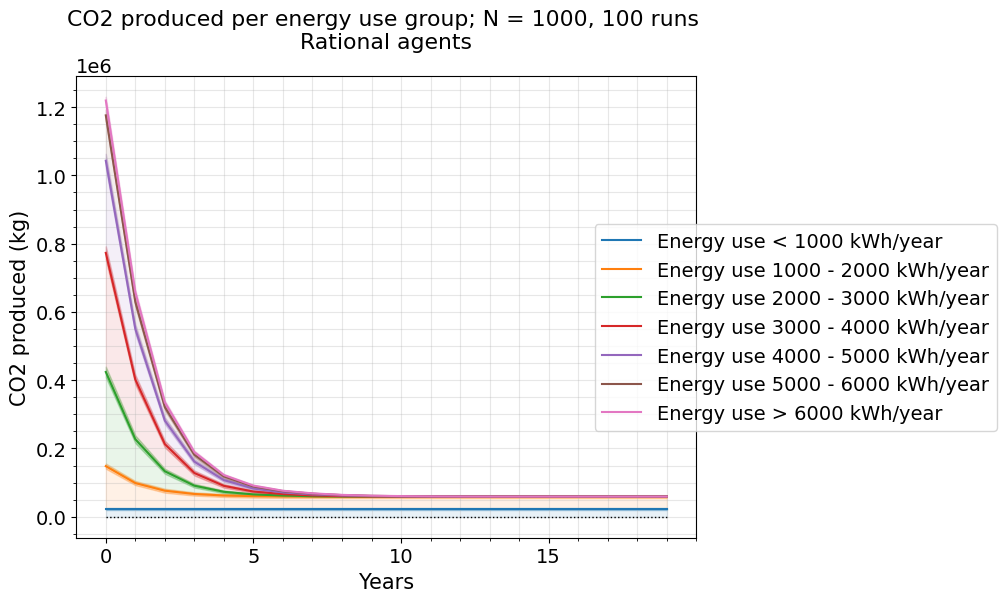

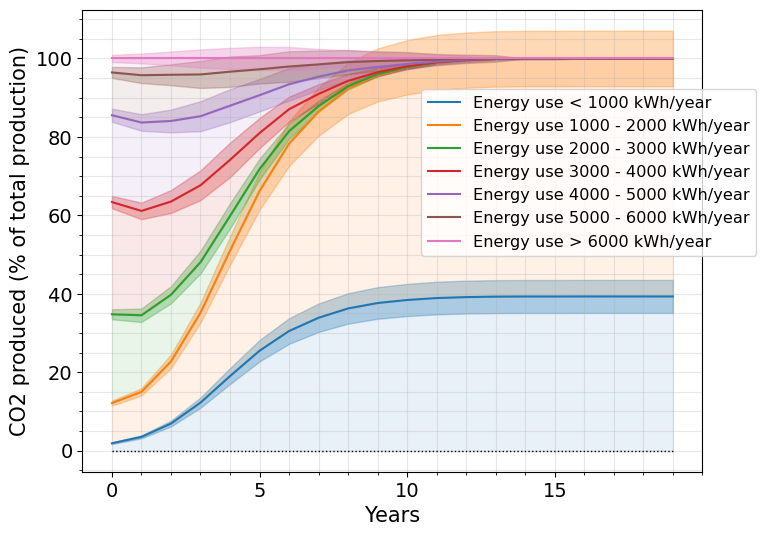

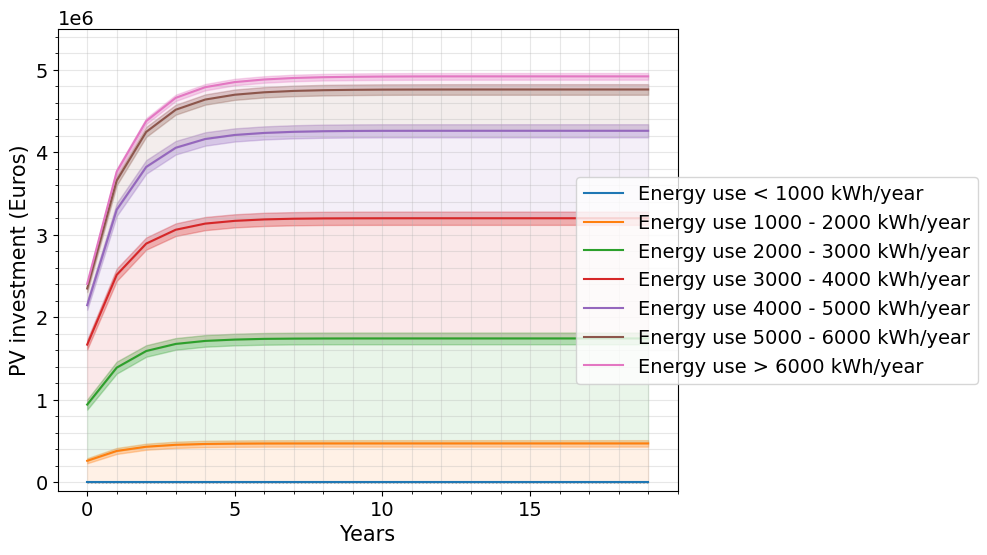

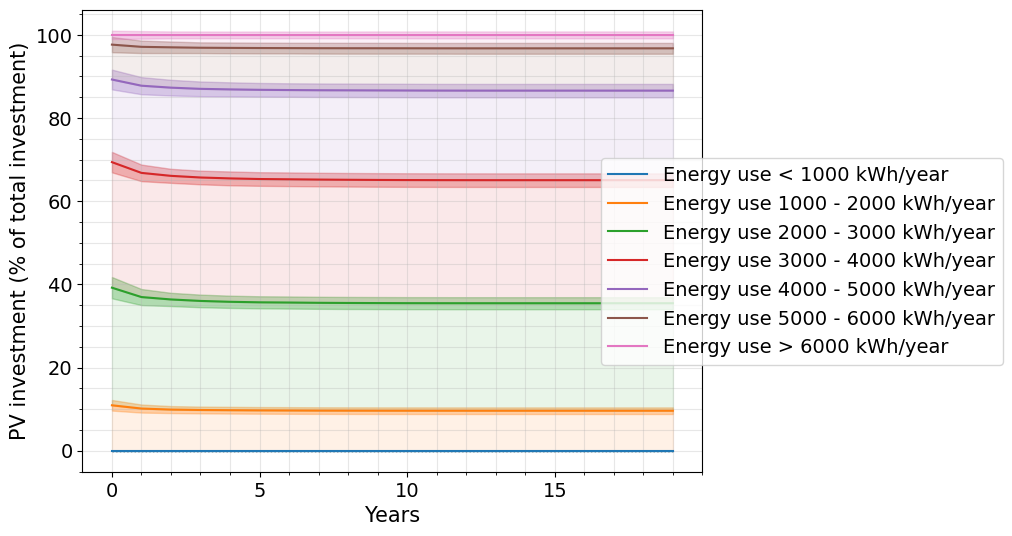

In [19]:
plot_CO2_emissions(df_mean, df_std, "Rational agents")
plot_PV_investment(df_mean, df_std, "Rational agents")

#### Behavioral agents

In [20]:
df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/TPB"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB/"
                            + file)
        df["Energy group"] = pd.cut(df["Energy use (kWh/year)"], energy_bins,
                                    labels=range(1,8))
        df = df.drop(["Energy use (kWh/year)"], axis=1)
        df = df.drop(0)
        df.reset_index()
        # Sum for total CO2 produced per income group per timestep
        df = df.groupby(["Step", "Energy group"]).sum().reset_index()
        df_list.append(df.to_numpy())

df_mean = pd.DataFrame(np.array(df_list).mean(axis=0),
                       index=df.index,
                       columns=df.columns)
df_std = pd.DataFrame(np.array(df_list).std(axis=0),
                      index=df.index,
                      columns=df.columns)
df_std["Step"] = df_mean["Step"]
df_std["Energy group"] = df_mean["Energy group"]
df_mean["CO2_produced (% of total)"] = df_mean["CO2_produced (kg)"]/df_mean.groupby(["Step"]).transform("sum")["CO2_produced (kg)"]*100
df_mean["PV_investment (% of total)"] = df_mean["PV_investment (Euros)"]/df_mean.groupby(["Step"]).transform("sum")["PV_investment (Euros)"]*100
df_std["CO2_produced (% of total)"] = df_std["CO2_produced (kg)"]/df_mean.groupby(["Step"]).transform("sum")["CO2_produced (kg)"]*100
df_std["PV_investment (% of total)"] = df_std["PV_investment (Euros)"]/df_mean.groupby(["Step"]).transform("sum")["PV_investment (Euros)"]*100
df_std[df_std["Step"] == 20]

,Step,Energy group,Income (Euros),PV_installed,PV_investment (Euros),CO2_saved (kg),CO2_produced (kg),Attitude,CO2_produced (% of total),PV_investment (% of total)
133,20.0,1.0,465405.562910,6.158726,15190.345201,1798.724563,1649.659509,4.193200,0.919365,0.335409
134,20.0,2.0,651610.103620,10.786746,40003.562066,7256.618057,4324.802621,7.043713,2.410238,0.883294
135,20.0,3.0,777603.910212,12.883210,64202.647940,14100.582901,6399.296556,7.716191,3.566366,1.417620
136,20.0,4.0,760780.689609,13.548708,83189.779263,19878.356680,8147.477434,8.079160,4.540637,1.836863
137,20.0,5.0,593903.894898,9.826922,72714.266778,18584.029783,7722.052971,5.969196,4.303546,1.605560
138,20.0,6.0,429493.405199,6.706713,58685.992431,15616.372563,5780.346131,3.486796,3.221421,1.295810
139,20.0,7.0,218452.102623,3.774705,37278.965229,10181.908157,3171.176942,1.836521,1.767316,0.823134


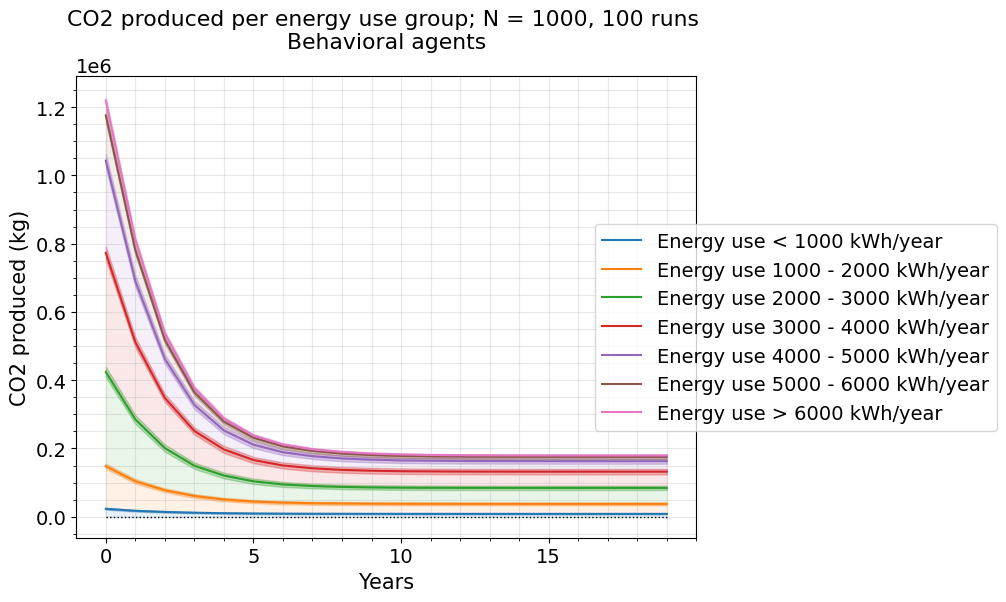

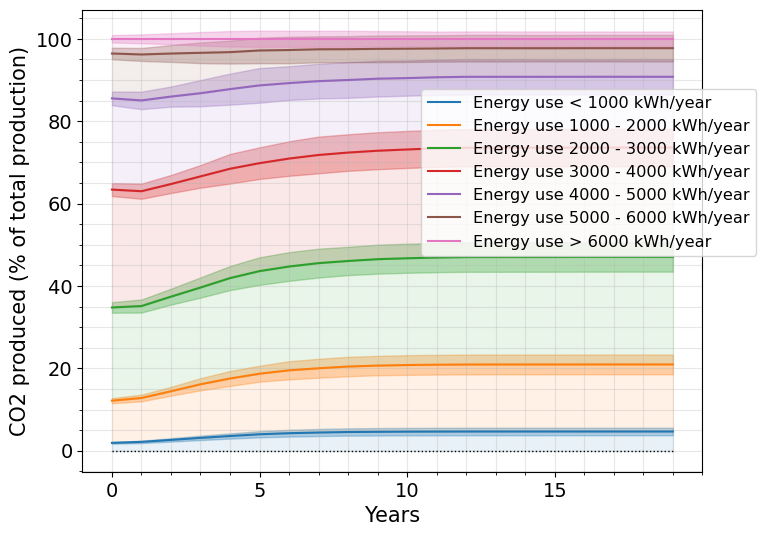

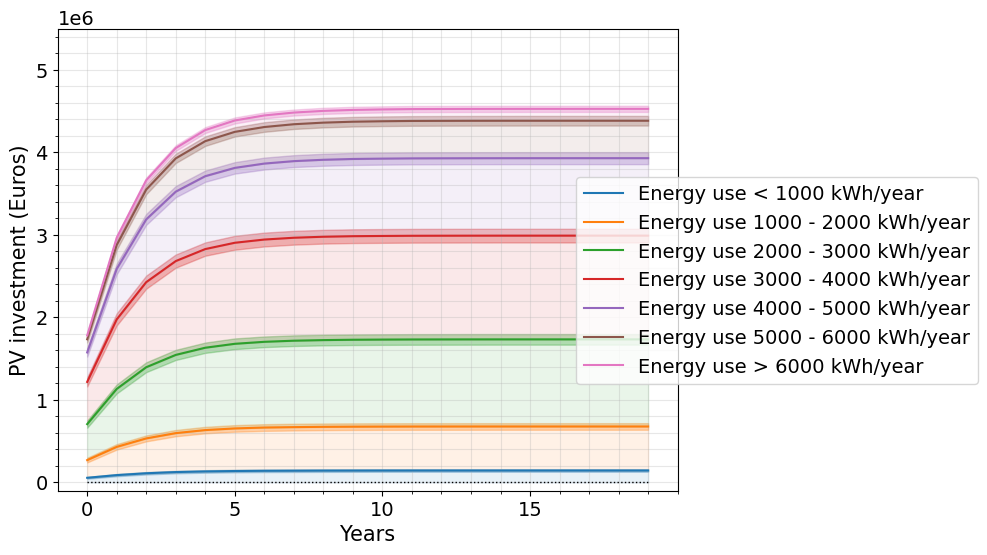

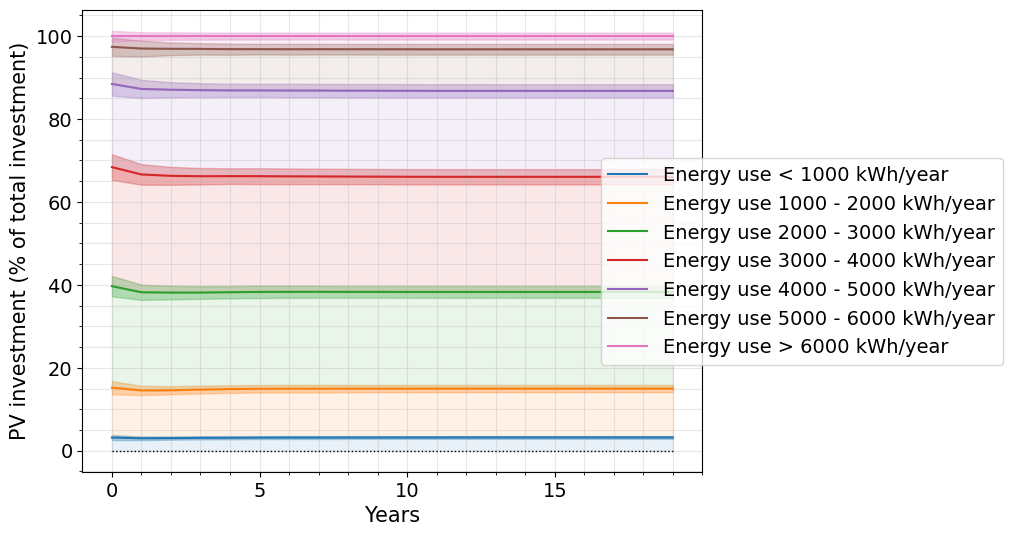

In [21]:
plot_CO2_emissions(df_mean, df_std, "Behavioral agents")
plot_PV_investment(df_mean, df_std, "Behavioral agents")

#### Behavioral agents + opinion dynamics

In [22]:
df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/TPB_with_opinion_dynamics"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB_with_opinion_dynamics/"
                            + file)
        df["Energy group"] = pd.cut(df["Energy use (kWh/year)"], energy_bins,
                                    labels=range(1,8))
        df = df.drop(["Energy use (kWh/year)"], axis=1)
        df = df.drop(0)
        df.reset_index()
        # Sum for total CO2 produced per income group per timestep
        df = df.groupby(["Step", "Energy group"]).sum().reset_index()
        df_list.append(df.to_numpy())

df_mean = pd.DataFrame(np.array(df_list).mean(axis=0),
                       index=df.index,
                       columns=df.columns)
df_std = pd.DataFrame(np.array(df_list).std(axis=0),
                      index=df.index,
                      columns=df.columns)
df_std["Step"] = df_mean["Step"]
df_std["Energy group"] = df_mean["Energy group"]
df_mean["CO2_produced (% of total)"] = df_mean["CO2_produced (kg)"]/df_mean.groupby(["Step"]).transform("sum")["CO2_produced (kg)"]*100
df_mean["PV_investment (% of total)"] = df_mean["PV_investment (Euros)"]/df_mean.groupby(["Step"]).transform("sum")["PV_investment (Euros)"]*100
df_std["CO2_produced (% of total)"] = df_std["CO2_produced (kg)"]/df_mean.groupby(["Step"]).transform("sum")["CO2_produced (kg)"]*100
df_std["PV_investment (% of total)"] = df_std["PV_investment (Euros)"]/df_mean.groupby(["Step"]).transform("sum")["PV_investment (Euros)"]*100
df_std[df_std["Step"] == 20]

,Step,Energy group,Income (Euros),PV_installed,PV_investment (Euros),CO2_saved (kg),CO2_produced (kg),Attitude,CO2_produced (% of total),PV_investment (% of total)
133,20.0,1.0,465405.562910,7.253964,17630.021931,2023.708912,1338.318884,2.549031,2.048300,0.348057
134,20.0,2.0,651610.103620,11.141436,41524.131590,7564.145415,3282.848683,4.896077,5.024407,0.819782
135,20.0,3.0,777603.910212,13.909202,69444.708171,15205.100898,4062.386449,5.639502,6.217491,1.370999
136,20.0,4.0,760780.689609,13.543323,82881.625736,19565.197028,4943.248412,5.082661,7.565652,1.636274
137,20.0,5.0,593903.894898,10.608789,78116.775391,19858.945690,4269.751136,3.987413,6.534863,1.542205
138,20.0,6.0,429493.405199,7.133975,62416.783292,16569.886869,3316.005073,2.057042,5.075153,1.232251
139,20.0,7.0,218452.102623,4.119454,40669.495653,11085.876279,2088.614791,1.134958,3.196629,0.802910


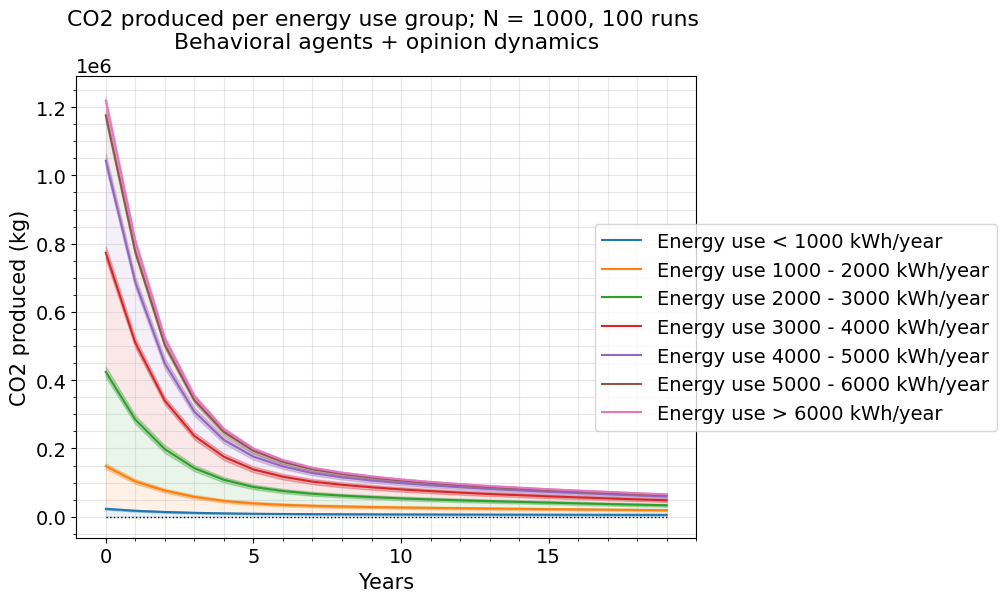

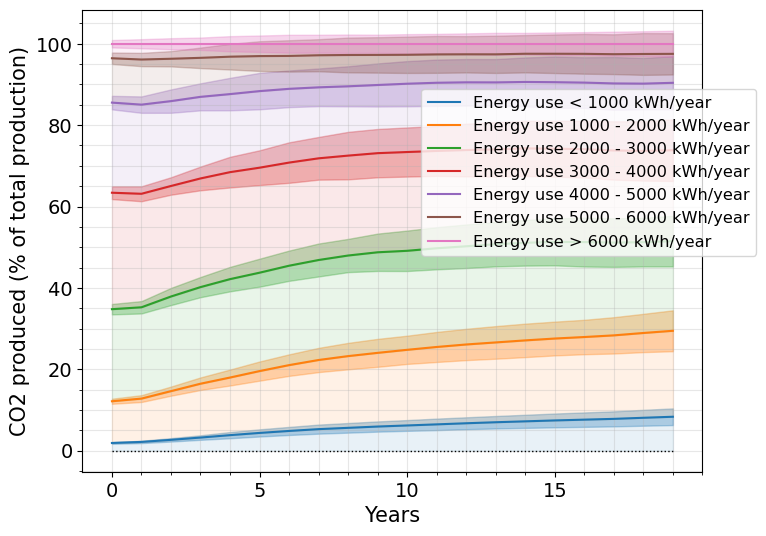

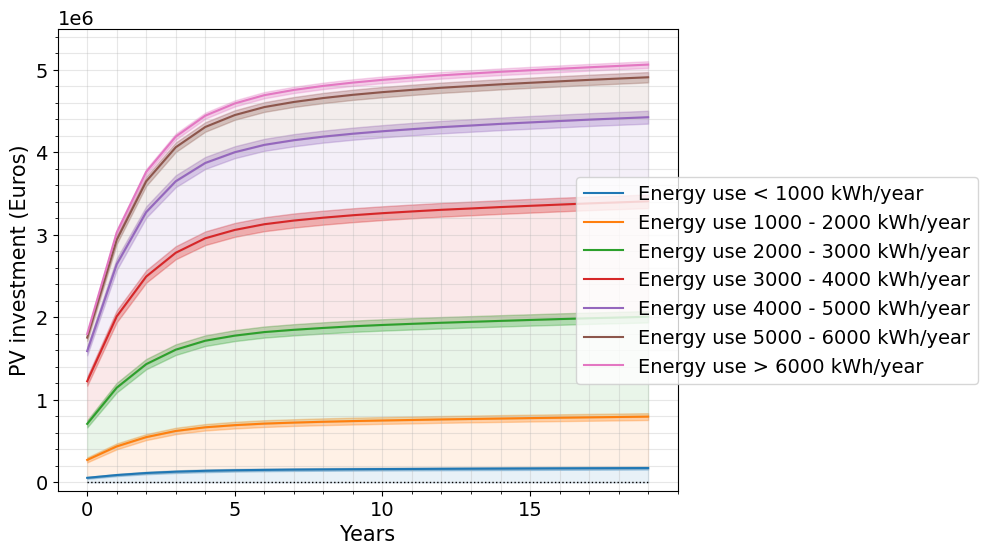

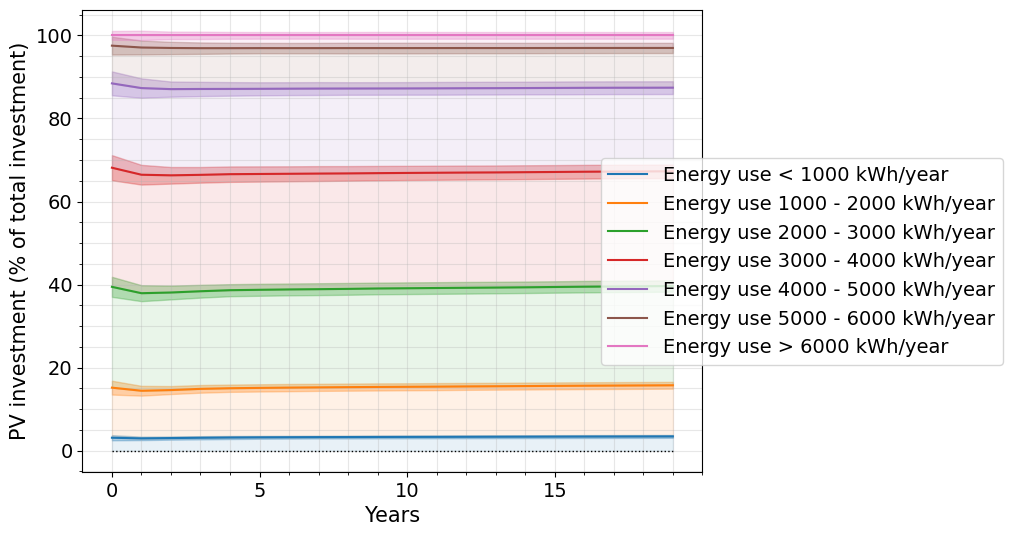

In [23]:
plot_CO2_emissions(df_mean, df_std, "Behavioral agents + opinion dynamics")
plot_PV_investment(df_mean, df_std, "Behavioral agents + opinion dynamics")

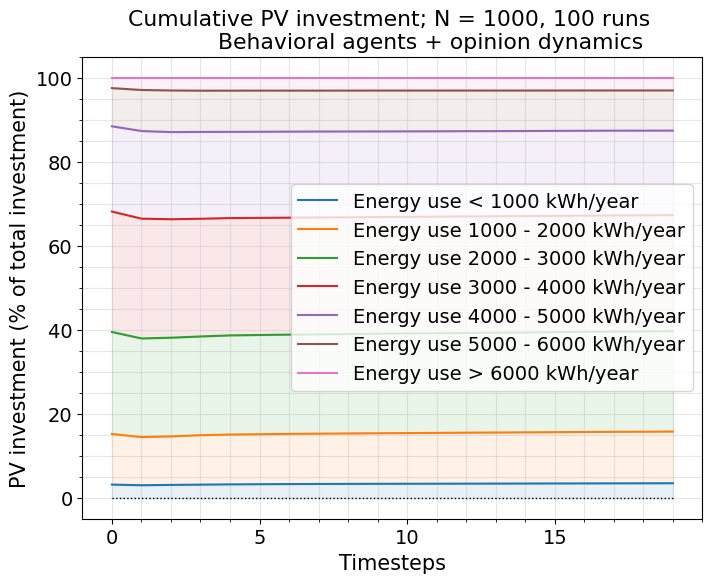

In [24]:
# PV investment, relatively (% of total investment)
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.title("Cumulative PV investment; N = 1000, 100 runs \n\
           Behavioral agents + opinion dynamics",
          fontsize=15.8)
plt.xlabel("Timesteps", fontsize=15)
plt.ylabel("PV investment (% of total investment)", fontsize=15)
plt.set_cmap("Blues")

timesteps = range(20)
PV_investment = np.zeros(len(timesteps))
plt.plot(timesteps, PV_investment, c="black", linestyle=":", linewidth=1)
for i in range(1, len(energy_bins)):
    PV_investment_prev = PV_investment.copy()
    PV_investment += df_mean[df_mean["Energy group"] == i]["PV_investment (% of total)"].values
    line = plt.plot(timesteps, PV_investment,
                    label=legend_labels[i-1])
    plt.fill_between(timesteps, PV_investment, PV_investment_prev,
                     color=line[0].get_color(), alpha=0.1)

plt.xlim(-1, 20)
plt.xticks(range(0, 20, 5))
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()
plt.legend()
plt.show()

### At end of simulation: compare rational and behavioral agents (per income group)

In [43]:
# Total values per group

df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/Rational"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/Rational/"
                            + file)
        df = df.loc[20]
        df["Income group"] = pd.cut(df["Income (Euros)"], income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
        df.reset_index()
        # Sum for total CO2 saved per income group per timestep
        df = df.groupby(["Income group"]).sum().reset_index()
        df_list.append(df.to_numpy())

df_rat = pd.DataFrame(np.array(df_list).mean(axis=0),
                      index=df.index,
                      columns=df.columns)

df_list = []
for file in os.listdir(os.getcwd() + "/results/TPB"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB/" + file)
        df = df.loc[20]
        df["Income group"] = pd.cut(df["Income (Euros)"], income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
        df.reset_index()
        # Sum for total CO2 saved per income group per timestep
        df = df.groupby(["Income group"]).sum().reset_index()
        df_list.append(df.to_numpy())

df_behav = pd.DataFrame(np.array(df_list).mean(axis=0),
                        index=df.index,
                        columns=df.columns)


# Mean values per group (values per capita)
df_list = []
for file in os.listdir(os.getcwd() +
                       "/results/Rational"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/Rational/"
                            + file)
        df = df.loc[20]
        df["Income group"] = pd.cut(df["Income (Euros)"],income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
        df.reset_index()
        # Sum for total CO2 saved per income group per timestep
        df = df.groupby(["Income group"]).mean().reset_index()
        df_list.append(df.to_numpy())

df_rat = pd.DataFrame(np.array(df_list).mean(axis=0),
                      index=df.index,
                      columns=df.columns)

df_rat["CO2_saved (% of total)"] = df_rat["CO2_saved (kg)"]/df_rat["CO2_saved (kg)"].sum()
df_rat["CO2_produced (% of total)"] = df_rat["CO2_produced (kg)"]/df_rat["CO2_produced (kg)"].sum()
df_rat["PV_investment (% of total)"] = df_rat["PV_investment (Euros)"]/df_rat["PV_investment (Euros)"].sum()

df_list = []
for file in os.listdir(os.getcwd() + "/results/TPB"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB/" + file)
        df = df.loc[20]
        df["Income group"] = pd.cut(df["Income (Euros)"], income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
        df.reset_index()
        # Sum for total CO2 saved per income group per timestep
        df = df.groupby(["Income group"]).mean().reset_index()
        df_list.append(df.to_numpy())

df_behav = pd.DataFrame(np.array(df_list).mean(axis=0),
                        index=df.index,
                        columns=df.columns)
df_behav["CO2_saved (% of total)"] = df_behav["CO2_saved (kg)"]/df_behav["CO2_saved (kg)"].sum()
df_behav["CO2_produced (% of total)"] = df_behav["CO2_produced (kg)"]/df_behav["CO2_produced (kg)"].sum()
df_behav["PV_investment (% of total)"] = df_behav["PV_investment (Euros)"]/df_behav["PV_investment (Euros)"].sum()

df_list = []
for file in os.listdir(os.getcwd() + "/results/TPB_with_opinion_dynamics"):
    if file.startswith("agent"):
        df = pd.read_pickle("results/TPB_with_opinion_dynamics/" + file)
        df = df.loc[20]
        df["Income group"] = pd.cut(df["Income (Euros)"], income_bins,
                                    labels=range(1,8))
        df = df.drop(["Income (Euros)"], axis=1)
        df.reset_index()
        # Sum for total CO2 saved per income group per timestep
        df = df.groupby(["Income group"]).mean().reset_index()
        df_list.append(df.to_numpy())

df_behav_opinion = pd.DataFrame(np.array(df_list).mean(axis=0),
                        index=df.index,
                        columns=df.columns)
df_behav_opinion["CO2_saved (% of total)"] = df_behav_opinion["CO2_saved (kg)"]/df_behav_opinion["CO2_saved (kg)"].sum()
df_behav_opinion["CO2_produced (% of total)"] = df_behav_opinion["CO2_produced (kg)"]/df_behav_opinion["CO2_produced (kg)"].sum()
df_behav_opinion["PV_investment (% of total)"] = df_behav_opinion["PV_investment (Euros)"]/df_behav_opinion["PV_investment (Euros)"].sum()

In [44]:
df_rat

,Income group,Energy use (kWh/year),PV_installed,PV_investment (Euros),CO2_saved (kg),CO2_produced (kg),CO2_saved (% of total),CO2_produced (% of total),PV_investment (% of total)
0,1.0,2894.596815,0.835490,4953.643464,1169.864175,60.339472,0.143148,0.148043,0.142885
1,2.0,2882.884788,0.834325,4942.851051,1166.070774,59.155261,0.142684,0.145138,0.142574
2,3.0,2895.665344,0.837322,4966.271933,1172.255819,58.401953,0.143440,0.143289,0.143250
3,4.0,2891.113446,0.837082,4957.707779,1169.895040,58.828174,0.143151,0.144335,0.143003
4,5.0,2904.951298,0.836368,4972.260964,1174.721960,59.882342,0.143742,0.146922,0.143422
5,6.0,2879.538886,0.831351,4925.787013,1161.592788,62.211239,0.142136,0.152636,0.142082
6,7.0,2839.499564,0.853767,4950.142500,1158.025450,48.761865,0.141699,0.119637,0.142784


In [45]:
df_behav

,Income group,Energy use (kWh/year),PV_installed,PV_investment (Euros),CO2_saved (kg),CO2_produced (kg),Attitude,CO2_saved (% of total),CO2_produced (% of total),PV_investment (% of total)
0,1.0,2894.596815,0.813811,4540.294131,1045.392936,184.810711,0.201777,0.143357,0.143515,0.142998
1,2.0,2882.884788,0.818070,4553.747648,1046.410753,178.815282,0.200149,0.143496,0.138859,0.143422
2,3.0,2895.665344,0.820277,4573.846504,1051.658672,178.999099,0.202002,0.144216,0.139002,0.144055
3,4.0,2891.113446,0.815173,4544.408726,1045.395911,183.327304,0.194776,0.143357,0.142363,0.143128
4,5.0,2904.951298,0.818780,4584.398401,1055.900923,178.703379,0.202446,0.144798,0.138772,0.144387
5,6.0,2879.538886,0.822959,4549.580142,1041.997346,181.806680,0.200970,0.142891,0.141182,0.143290
6,7.0,2839.499564,0.802061,4404.471881,1005.500926,201.286388,0.186782,0.137886,0.156309,0.138720


In [46]:
df_behav_opinion

,Income group,Energy use (kWh/year),PV_installed,PV_investment (Euros),CO2_saved (kg),CO2_produced (kg),Attitude,CO2_saved (% of total),CO2_produced (% of total),PV_investment (% of total)
0,1.0,2894.596815,0.917780,5074.466916,1159.086357,71.117290,0.198562,0.142755,0.154401,0.142400
1,2.0,2882.884788,0.923905,5083.904648,1157.736326,67.489709,0.200073,0.142589,0.146525,0.142665
2,3.0,2895.665344,0.927122,5113.446346,1167.002065,63.655706,0.199573,0.143730,0.138201,0.143494
3,4.0,2891.113446,0.922919,5087.025631,1160.947800,67.775415,0.197121,0.142984,0.147145,0.142753
4,5.0,2904.951298,0.924224,5116.612682,1169.385362,65.218939,0.200525,0.144024,0.141595,0.143583
5,6.0,2879.538886,0.929236,5092.692497,1159.928000,63.876027,0.200221,0.142859,0.138679,0.142912
6,7.0,2839.499564,0.931765,5067.118333,1145.317912,61.469402,0.191976,0.141059,0.133454,0.142194


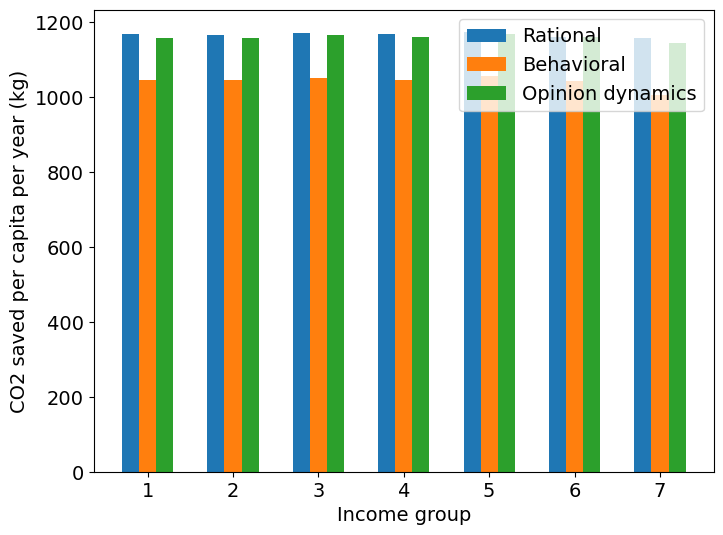

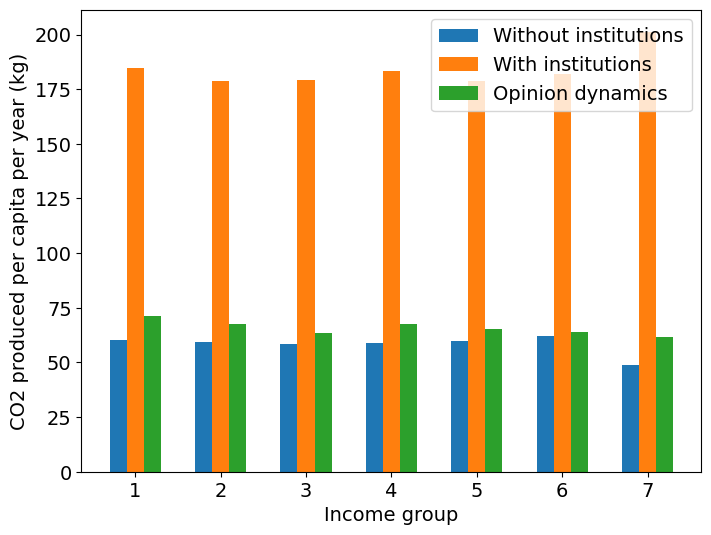

In [47]:
# Absolute values of saved and produced
plt.bar(df_rat["Income group"] - 0.2,
        df_rat["CO2_saved (kg)"],
        label="Rational", width=0.2)
plt.bar(df_behav["Income group"],
        df_behav["CO2_saved (kg)"],
        label="Behavioral", width=0.2)
plt.bar(df_behav_opinion["Income group"] + 0.2,
        df_behav_opinion["CO2_saved (kg)"],
        label="Opinion dynamics", width=0.2)
plt.xlabel("Income group")
plt.ylabel("CO2 saved per capita per year (kg)")
plt.legend()
plt.show()

plt.bar(df_rat["Income group"] - 0.2,
        df_rat["CO2_produced (kg)"],
        label="Without institutions", width=0.2)
plt.bar(df_behav["Income group"],
        df_behav["CO2_produced (kg)"],
        label="With institutions", width=0.2)
plt.bar(df_behav_opinion["Income group"] + 0.2,
        df_behav_opinion["CO2_produced (kg)"],
        label="Opinion dynamics", width=0.2)
plt.xlabel("Income group")
plt.ylabel("CO2 produced per capita per year (kg)")
plt.legend()
plt.show()

### Influence rates

#### Plot range of influence rates against representative rational agent, rational agents and behavioral agents without opinion dynamics

In [51]:
df_rep_rat_mean, _ = read_all_runs("results/Representative_rational_agent/")
df_rat_mean, df_rat_std = read_all_runs("results/Rational/")
df_TPB_mean, df_TPB_std = read_all_runs("results/TPB/")

df_rep_rat_mean["PV_investment (Euros)"] = df_rep_rat_mean["PV_investment (Euros)"]/1e4
df_rat_mean["PV_investment (Euros)"] = df_rat_mean["PV_investment (Euros)"]/1e3
df_rat_std["PV_investment (Euros)"] = df_rat_std["PV_investment (Euros)"]/1e3
df_TPB_mean["PV_investment (Euros)"] = df_TPB_mean["PV_investment (Euros)"]/1e3
df_TPB_std["PV_investment (Euros)"] = df_TPB_std["PV_investment (Euros)"]/1e3

Influence rate = 006
Influence rate = 007
Influence rate = 008
Influence rate = 009
Influence rate = 010
Influence rate = 011
Influence rate = 012
Influence rate = 013
Influence rate = 014


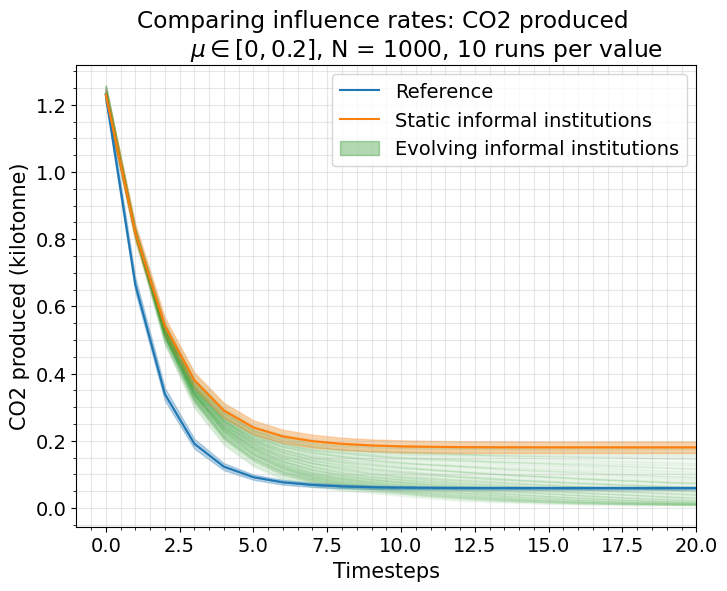

In [52]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

# Plot diffusion rate (N of households taken action) over time
timesteps = df_rep_rat_mean.index

# Set plot layout
plt.xlim(-1, 20)
plt.grid(True, which="major", alpha=0.3)
plt.grid(True, which="minor", alpha=0.3)
plt.minorticks_on()

# Influence rates between 0 and 1, stepwise increase of 0.02
path = "results/Influence_rates/"
files = ["000", "001", "002", "003", "004", "005", "006",
         "007", "008", "009", "010", "011", "012", "013",
         "014", "015", "016", "017", "018", "019", "020"]
# colors = cm.get_cmap("Greens_r")
for i, file in enumerate(files[:15]):
    df_mean, df_std = read_all_runs(path + str(file) + "/")
    plt.plot(df_mean.index, df_mean["CO2_produced (kilotonne)"],
             color="tab:green", alpha=0.05)
    plt.fill_between(df_std.index, df_mean["CO2_produced (kilotonne)"],
                     df_mean["CO2_produced (kilotonne)"] - df_std["CO2_produced (kilotonne)"],
                     color="tab:green", alpha=0.05)
    plt.fill_between(df_std.index, df_mean["CO2_produced (kilotonne)"],
                     df_mean["CO2_produced (kilotonne)"] + df_std["CO2_produced (kilotonne)"],
                     color="tab:green", alpha=0.05)
    if (df_mean["CO2_produced (kilotonne)"] < df_rat_mean["CO2_produced (kilotonne)"])[1:].any():
        print("Influence rate =", file)
#         print(df_mean["CO2_produced (kilotonne)"])

# Plot mean and std for all implementations
plt.plot(timesteps, df_rat_mean["CO2_produced (kilotonne)"],
         label="Reference")
plt.fill_between(timesteps, df_rat_mean["CO2_produced (kilotonne)"],
                 df_rat_mean["CO2_produced (kilotonne)"] - df_rat_std["CO2_produced (kilotonne)"],
                color="tab:blue", alpha=0.3)
plt.fill_between(timesteps, df_rat_mean["CO2_produced (kilotonne)"],
                 df_rat_mean["CO2_produced (kilotonne)"] + df_rat_std["CO2_produced (kilotonne)"],
                 color="tab:blue", alpha=0.3)
plt.plot(timesteps, df_TPB_mean["CO2_produced (kilotonne)"],
         label="Static informal institutions", color="tab:orange")
plt.fill_between(timesteps, df_TPB_mean["CO2_produced (kilotonne)"],
                 df_TPB_mean["CO2_produced (kilotonne)"] - df_TPB_std["CO2_produced (kilotonne)"],
                 color="tab:orange", alpha=0.3)
plt.fill_between(timesteps, df_TPB_mean["CO2_produced (kilotonne)"],
                 df_TPB_mean["CO2_produced (kilotonne)"] + df_TPB_std["CO2_produced (kilotonne)"],
                 color="tab:orange", alpha=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles.append(mpatches.Patch(color="green", alpha=0.3, label="Evolving informal institutions"))

plt.title("Comparing influence rates: CO2 produced \n \
          $\mu \in [0, 0.2]$, N = 1000, 10 runs per value")
plt.xlabel("Timesteps", fontsize=15)
plt.ylabel("CO2 produced (kilotonne)", fontsize=15)
plt.legend(handles=handles)

plt.show()